In [278]:
import requests # to fetch the content from the url given
import bs4  # to fetch the transcript of each comedian 
import pickle #converting a Python object into a byte stream to store it in a file/database
import pandas as pd # to convert the comedians and their transcripts into a data frame
import re  # to clean data we have to check whether a particular string matches a given regular expression
import string  # to do string manipulation
from sklearn.feature_extraction.text import CountVectorizer #to create a document-term matrix using CountVectorizer,
                                                            #and exclude common English stop words
from collections import Counter# to count the most common words used by every comedian
from sklearn.feature_extraction import text # extract features from data set
from wordcloud import WordCloud # to explore data by making a word cloud of the top 30 words 
import matplotlib.pyplot as plt # to visualize data by plotting the scatter plot 
import numpy as np #to work on the data frame
from textblob import TextBlob #for sentimental analysis

In [279]:
def url_to_transcript(url):
    res=requests.get(url)
    data=bs4.BeautifulSoup(res.text,'lxml')
    text=[p.text for p in data.find(class_="elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content").find_all('p')]
    print(url)
    return text

In [280]:
urls=['https://scrapsfromtheloft.com/2018/12/15/vir-das-losing-it-transcript/',
     'https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
     'https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
     'https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
      'https://scrapsfromtheloft.com/comedy/john-mulaney-comeback-kid-2015-full-transcript/',
      'https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/',
      'https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/',
      'https://scrapsfromtheloft.com/comedy/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
      'https://scrapsfromtheloft.com/comedy/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
     'https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/'
     ]

In [281]:
comedians=['Vir','dave','ricky','bill','john','hasan','ali','anthony','mike','joe']

In [282]:
transcripts=[url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2018/12/15/vir-das-losing-it-transcript/
https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/
https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/
https://scrapsfromtheloft.com/comedy/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/


In [283]:
(transcripts)[0]

['I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you guys excited, yeah? All right. Well, my name is Vir Das. We’re gonna have such a good time tonight. I’m so excited. It’s gonna be delightful. Oh, this is how I talk now. I just thought it was time to really embrace my roots, you know, and to make my comedy more authentically Indian. And really, what could be more Indian than a fake American accent? I don’t think you understand. I have an opportunity to make history tonight, guys. I can. I can be the first ever Indian who comes to California… and then leaves. That’s never happened before. Because you guys are sticking around. Until they kick you out. Which, going by the news, is about three weeks from now.',
 'Now, I used to work in America in the year 2002. It didn’t go very well, so I left for browner pastures. And then, honestly, I didn’t think about you guys for 15 years. Because, honestly

In [284]:

for i,c in enumerate(comedians):
    with open(r'C:\Users\aaliya\Desktop\transcript/'+c+'.txt','wb') as file:
        pickle.dump(transcripts[i],file)

In [285]:
data={}
for i,c in enumerate(comedians):
    data[c]=transcripts[i]


In [286]:
data['dave']

['This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the alchemist’s fire that transforms fear and tragedy into levity and livelihood. Dave calls that look “the trance.”',
 '♪ Play me ♪\n♪ Buy me ♪\n♪ Workinonit ♪\n♪ Tune up ♪\n♪ Tune ♪\n♪ Oh ♪\n ♪ Fade me ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪\n♪ In every ghetto ♪\n♪ Ah-ah, ah-ah, ah-ah ♪',
 'Thank you! Thank you very much! Thank you all. Oh, wow. That was exciting, wasn’t it? Thank you, guys. Have a seat, feel comfortable, relax. I want to thank everyone in LA for a wonderful week. It’s been great here. You know what? It’s been ten years since the last time I played Los Angeles, if you can imagine. I know! I know, I’ve been gone f

In [287]:
data.keys()

dict_keys(['Vir', 'dave', 'ricky', 'bill', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [288]:
def combine_text(list_of_text):
    combined_text=' '.join(list_of_text)
    return combined_text

In [289]:
data_combined={key:[combine_text(value)] for key,value in data.items()}

In [290]:
data_combined

{'Vir': ['I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you guys excited, yeah? All right. Well, my name is Vir Das. We’re gonna have such a good time tonight. I’m so excited. It’s gonna be delightful. Oh, this is how I talk now. I just thought it was time to really embrace my roots, you know, and to make my comedy more authentically Indian. And really, what could be more Indian than a fake American accent? I don’t think you understand. I have an opportunity to make history tonight, guys. I can. I can be the first ever Indian who comes to California… and then leaves. That’s never happened before. Because you guys are sticking around. Until they kick you out. Which, going by the news, is about three weeks from now. Now, I used to work in America in the year 2002. It didn’t go very well, so I left for browner pastures. And then, honestly, I didn’t think about you guys for 15 years. Because, hone

In [291]:

pd.set_option('max_colwidth',150)
data_df=pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns=['transcript']

In [292]:
data_df

,transcript
Vir,"I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you gu..."
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ..."


In [293]:
#cleaning data in nlp

def clean_text_round1(text):
    text=text.lower()
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    text=re.sub('\[.*?\]','',text)#extract bracket words
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)#remove punctuation
    text=re.sub('\w*\d\w*','',text)#extract the words having numerical value at the end ,at the start or middle and individual number itself
    return text
    

In [294]:
round1=lambda x:clean_text_round1(x)#every transcript acts as x

In [295]:
data_clean=pd.DataFrame(data_df.transcript.apply(round1))#storing our clean transcripts in a new data frame
#In apply function we are passing the lambda function
data_clean

,transcript
Vir,i lost of my mind it’s very freeing you should see the look on your faces right now by the way oh good evening san francisco are you guys excited...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
john,armed with boyish charm and a sharp wit the former “snl” writer john mulaney offers sly takes on marriage his beef with babies and the time he met...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us we’re here this is crazy it’s insane so about five yea...
joe,ladies and gentlemen welcome joe rogan what the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down f...


In [296]:
#we are going to create a document-term matrix using count vectorizer,and exclude common english stop words 
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(data_clean.transcript)
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=data_clean.index
data_cv

<10x6789 sparse matrix of type '<class 'numpy.int64'>'
	with 13887 stored elements in Compressed Sparse Row format>

In [297]:
#In the result which words are used and not used by each comedian and also the frequency of the words used
data_dtm

,aaaaah,aaah,abc,abcs,abducted,ability,abject,abki,able,abortion,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,1,0
bill,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
john,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
hasan,0,0,0,0,0,0,0,0,1,0,...,2,1,0,1,0,0,0,0,0,0
ali,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
#to see transcript of vir
data_dtm.loc['Vir']

aaaaah      0
aaah        0
abc         0
abcs        0
abducted    1
           ..
zombie      0
zombies     0
zoning      0
zoo         0
éclair      0
Name: Vir, Length: 6789, dtype: int64

In [299]:

data_dtm.to_pickle(r"C:\Users\aaliya\Desktop\pickle\dtm.pkl")
data_clean.to_pickle(r"C:\Users\aaliya\Desktop\pickle\clean.pkl")

In [300]:
#for reading

data=pd.read_pickle(r'C:\Users\aaliya\Desktop\pickle\dtm.pkl')
data=data.transpose()
data


,Vir,dave,ricky,bill,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,1,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,1,0,0,0
abcs,0,0,0,1,0,0,0,0,0,0
abducted,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
zombie,0,0,0,1,0,0,1,0,0,0
zombies,0,0,0,1,0,0,0,0,0,0
zoning,0,0,0,1,0,0,0,0,0,0
zoo,0,0,1,0,0,0,0,0,0,0


In [301]:
#extracting top 30 words each and every comedian uses
top_dict={}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)#sorting the freq of words in descending order de
    #c is the name of all the comedians
    top_dict[c]=list(zip(top.index,top.values))#store the words and their frequency
top_dict


{'Vir': [('like', 76),
  ('just', 63),
  ('know', 54),
  ('shit', 44),
  ('don', 39),
  ('think', 31),
  ('right', 28),
  ('guys', 25),
  ('indian', 24),
  ('yeah', 24),
  ('did', 24),
  ('years', 22),
  ('world', 22),
  ('india', 21),
  ('got', 21),
  ('people', 20),
  ('beautiful', 20),
  ('beef', 19),
  ('man', 18),
  ('day', 18),
  ('fuck', 17),
  ('believe', 17),
  ('time', 17),
  ('good', 16),
  ('went', 16),
  ('big', 16),
  ('men', 16),
  ('god', 16),
  ('thing', 16),
  ('tell', 15)],
 'dave': [('like', 103),
  ('know', 79),
  ('said', 63),
  ('just', 61),
  ('shit', 46),
  ('people', 43),
  ('didn', 39),
  ('don', 38),
  ('ahah', 38),
  ('time', 36),
  ('fuck', 33),
  ('fucking', 32),
  ('black', 31),
  ('man', 30),
  ('got', 27),
  ('good', 27),
  ('ve', 22),
  ('right', 22),
  ('gonna', 21),
  ('gay', 20),
  ('lot', 20),
  ('did', 19),
  ('yeah', 19),
  ('oj', 18),
  ('kevin', 18),
  ('oh', 18),
  ('let', 17),
  ('come', 17),
  ('room', 15),
  ('want', 15)],
 'ricky': [('rig

In [1]:
#To analyze which comedian is more funny and which comedian is unique we will focus on words uniquely used by each comedian
#this will give 30 words used by each comedian
#aim is to get rid of words which are used by each comedian
words=[]
for comedian in data.columns:
    top=[word for (word,count) in top_dict[comedian]]
    #all the 30 words of each comedian are stored in words 
    for t in top:
        words.append(t)

NameError: name 'data' is not defined

In [303]:
words

['like',
 'just',
 'know',
 'shit',
 'don',
 'think',
 'right',
 'guys',
 'indian',
 'yeah',
 'did',
 'years',
 'world',
 'india',
 'got',
 'people',
 'beautiful',
 'beef',
 'man',
 'day',
 'fuck',
 'believe',
 'time',
 'good',
 'went',
 'big',
 'men',
 'god',
 'thing',
 'tell',
 'like',
 'know',
 'said',
 'just',
 'shit',
 'people',
 'didn',
 'don',
 'ahah',
 'time',
 'fuck',
 'fucking',
 'black',
 'man',
 'got',
 'good',
 've',
 'right',
 'gonna',
 'gay',
 'lot',
 'did',
 'yeah',
 'oj',
 'kevin',
 'oh',
 'let',
 'come',
 'room',
 'want',
 'right',
 'like',
 'just',
 'don',
 'know',
 've',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'went',
 'people',
 'didn',
 'little',
 'joke',
 'll',
 'thing',
 'going',
 'day',
 'years',
 'saying',
 'big',
 'bob',
 'god',
 'oh',
 'come',
 'mean',
 'tweet',
 'nuts',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'fuck',
 'want',
 'll',
 'think',
 'guy',
 'let',
 'people',
 'did',
 'didn',
 '

In [304]:
#to count the frequency of top 30 words of each comedian.if the frequency of any word is 10 then it is used by each comedian

Counter(words)

Counter({'like': 10,
         'just': 10,
         'know': 10,
         'shit': 5,
         'don': 10,
         'think': 6,
         'right': 10,
         'guys': 3,
         'indian': 1,
         'yeah': 7,
         'did': 5,
         'years': 2,
         'world': 2,
         'india': 1,
         'got': 10,
         'people': 10,
         'beautiful': 1,
         'beef': 1,
         'man': 3,
         'day': 5,
         'fuck': 4,
         'believe': 1,
         'time': 8,
         'good': 4,
         'went': 3,
         'big': 2,
         'men': 1,
         'god': 3,
         'thing': 4,
         'tell': 3,
         'said': 5,
         'didn': 5,
         'ahah': 1,
         'fucking': 3,
         'black': 1,
         've': 4,
         'gonna': 7,
         'gay': 1,
         'lot': 2,
         'oj': 1,
         'kevin': 1,
         'oh': 6,
         'let': 3,
         'come': 3,
         'room': 1,
         'want': 4,
         'say': 6,
         'little': 3,
         'joke': 2,
     

In [305]:
#now extract most common words

add_stop_words=[word for word,count in Counter(words).most_common() if count>6]
add_stop_words

['like',
 'just',
 'know',
 'don',
 'right',
 'got',
 'people',
 'time',
 'yeah',
 'gonna']

In [306]:

data_clean=pd.read_pickle(r'C:\Users\aaliya\Desktop\pickle\clean.pkl')
#To get rid of the most common words
from sklearn.feature_extraction.text import CountVectorizer
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)
cv=CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(data_clean.transcript)
data_stop=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index=data_clean.index
data_stop

,aaaaah,aaah,abc,abcs,abducted,ability,abject,abki,able,abortion,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,1,0
bill,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
john,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
hasan,0,0,0,0,0,0,0,0,1,0,...,2,1,0,1,0,0,0,0,0,0
ali,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
data_clean

,transcript
Vir,i lost of my mind it’s very freeing you should see the look on your faces right now by the way oh good evening san francisco are you guys excited...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
john,armed with boyish charm and a sharp wit the former “snl” writer john mulaney offers sly takes on marriage his beef with babies and the time he met...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us we’re here this is crazy it’s insane so about five yea...
joe,ladies and gentlemen welcome joe rogan what the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down f...


In [308]:
#now we will analyze the trend of comedy or type of comedy
wc=WordCloud(stopwords=stop_words,background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

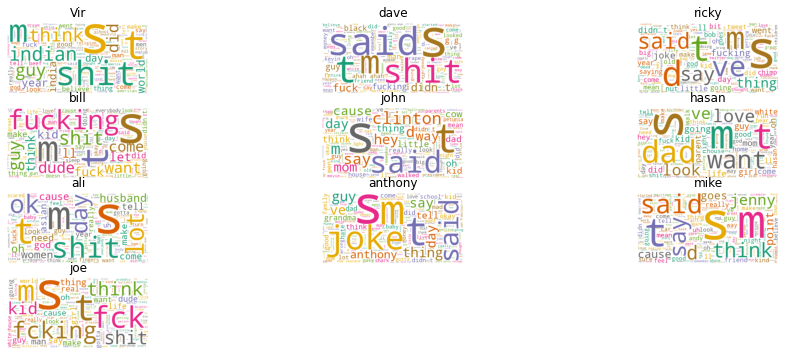

In [309]:

plt.rcParams['figure.figsize']=[16,6]
full_names=['Vir', 'dave', 'ricky', 'bill', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

#it have indexes of a particular list
#generate word cloud of each comedian
for index,comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(4,3,index+1)#plot a lot of plots in a single plot
    plt.imshow(wc)
    plt.axis('off')
    plt.title(full_names[index])
plt.show()
#word cloud shows different words used and the most used words are large in size
#we can analyze which are doing clean comedy




In [310]:
#analyzing the vocbulary
unique_list=[]
for comedian in data.columns:
    uniques=data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
#unique words used
#we have to see the row having non zero values
unique_list

[1366, 1345, 1583, 1603, 1353, 1519, 1319, 956, 1453, 1390]

In [311]:
data_words=pd.DataFrame({'comedian':full_names,'unique_words':unique_list})
data_unique_sort=data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
7,anthony,956
6,ali,1319
1,dave,1345
4,john,1353
0,Vir,1366
9,joe,1390
8,mike,1453
5,hasan,1519
2,ricky,1583
3,bill,1603


Text(0.5, 1.0, 'Number of Unique Words')

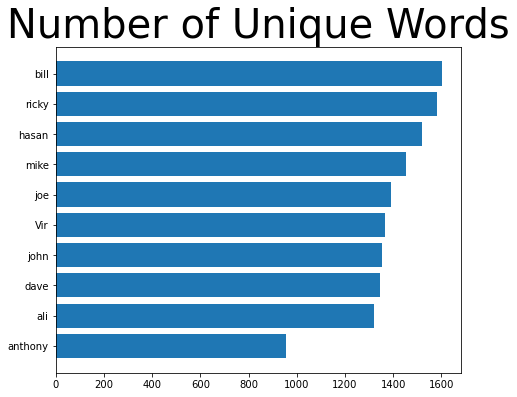

In [312]:
#Let's plot our findings

y_pos=np.arange(len(data_words))
plt.subplot(1,2,1)
plt.barh(y_pos,data_unique_sort.unique_words,align='center')
plt.yticks(y_pos,data_unique_sort.comedian)
plt.title("Number of Unique Words",fontsize=40)



In [313]:
#analyzing number of bad words used
#that which comedian uses clean comedy
data.transpose()
#transpose as I have to see only bad words
data_bad_words=data.transpose()[['shit','fuck','fucking']]
data_bad_words['f_word']=data_bad_words['fuck']+data_bad_words['fucking']
data_bad_words['s_word']=data_bad_words['shit']
data_bad_words.drop(['shit','fuck','fucking'],axis=1,inplace=True)
#true as it should be reflected in original data
data_bad_words

,f_word,s_word
Vir,24,44
dave,65,46
ricky,62,6
bill,106,64
john,4,6
hasan,24,15
ali,16,34
anthony,15,9
mike,0,0
joe,0,40


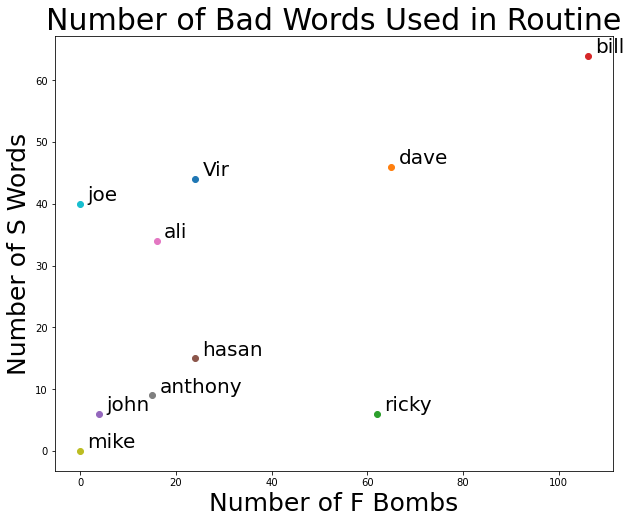

In [314]:
#let's make a plot again to communicate results as visualization is easy
plt.rcParams['figure.figsize']=[10,8]
for i,comedian in enumerate(data_bad_words.index):
    x=data_bad_words.f_word.loc[comedian]
    y=data_bad_words.s_word.loc[comedian]
    plt.scatter(x,y)
    plt.text(x+1.5,y+0.5,full_names[i],fontsize=20)
plt.title('Number of Bad Words Used in Routine',fontsize=30)
plt.xlabel('Number of F Bombs',fontsize=25)
plt.ylabel('Number of S Words',fontsize=25)
plt.show()

In [315]:
#sentiment analysis

pol=lambda x:TextBlob(x).sentiment.polarity
sub=lambda x:TextBlob(x).sentiment.subjectivity
data_clean['full_names']=full_names
data_clean['polarity']=data_clean['transcript'].apply(pol)
data_clean['subjectivity']=data_clean['transcript'].apply(sub)
data_clean


,transcript,full_names,polarity,subjectivity
Vir,i lost of my mind it’s very freeing you should see the look on your faces right now by the way oh good evening san francisco are you guys excited...,Vir,0.099701,0.498607
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,dave,-0.003905,0.514371
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...,ricky,0.065136,0.497274
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,bill,0.017374,0.536474
john,armed with boyish charm and a sharp wit the former “snl” writer john mulaney offers sly takes on marriage his beef with babies and the time he met...,john,0.079627,0.483822
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,hasan,0.090733,0.454879
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,ali,0.066938,0.482403
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,anthony,0.054471,0.559077
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us we’re here this is crazy it’s insane so about five yea...,mike,0.092897,0.518925
joe,ladies and gentlemen welcome joe rogan what the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down f...,joe,0.080371,0.531964


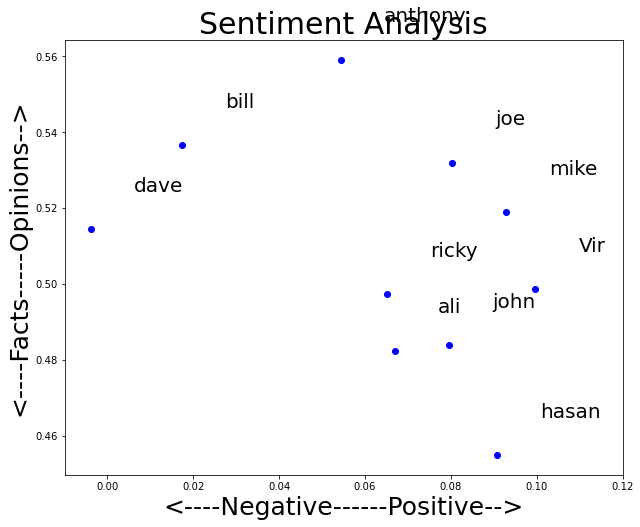

In [316]:

plt.rcParams['figure.figsize']=[10,8]
for index,comedian in enumerate(data_clean.index):
    x=data_clean.polarity.loc[comedian]
    y=data_clean.subjectivity.loc[comedian]
    plt.scatter(x,y,color='blue')
    
    plt.text(x+0.01,y+0.01,data_clean['full_names'][index],fontsize=20)
    plt.xlim(-.01,.12)
plt.title('Sentiment Analysis',fontsize=30)
plt.xlabel('<----Negative------Positive-->',fontsize=25)
plt.ylabel('<----Facts-----Opinions-->',fontsize=25)
plt.show()